## D212 - Data Mining II - PA1

### Background Info:

**You are an analyst on a team of analysts for a popular medical hospital chain with patients in almost every state in the United States. You have been asked to investigate the extent to which readmission is a problem for this chain of hospitals.The purpose of the analysis is to predict readmission based on other conditions and factors of the patient.**

**You have been asked to use PCA to analyze patient data to identify the principal variables of your patients, ultimately allowing better business and strategic decision-making for the hospital.**

### Import Libraries

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.cluster.vq import kmeans, vq

### Load Data From medical_clean.csv

In [4]:
# load data file
df = pd.read_csv('medical_clean.csv')
# quick test the data is present and see the shape
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


---
### Exploratory Data Analysis
---

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

### Check for Missing Values

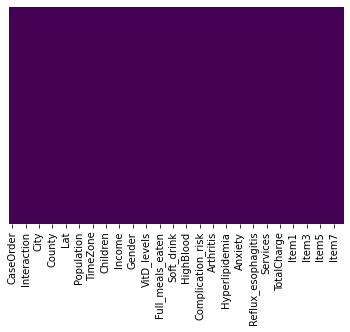

In [6]:
# Mapping to view missing data...none present.
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [7]:
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,...,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,...,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,...,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,...,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,...,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,...,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,...,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


### Describe and Explore Numeric Fields:

In [8]:
df.describe(include = [np.number])

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,...,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,...,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,...,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,...,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,...,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,...,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,...,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


#### Create DataFrame w/Number DataTypes Only

In [9]:
df_num = df.select_dtypes(include='number')
df_num.head()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,35621,34.34960,-86.72508,2951,1,53,86575.93,19.141466,6,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,32446,30.84513,-85.22907,11303,3,51,46805.99,18.940352,4,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,57110,43.54321,-96.63772,17125,3,53,14370.14,18.057507,4,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,56072,43.89744,-93.51479,2162,0,78,39741.49,16.576858,4,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,23181,37.59894,-76.88958,5287,1,22,1209.56,17.439069,5,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


### Describe and Explore Categorical Fields:

In [10]:
df.describe(exclude=[np.number])

,Customer_id,Interaction,UID,City,State,County,Area,TimeZone,Job,Marital,...,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,10000,10000,10000,6072,52,1607,3,26,639,5,...,2,2,2,2,2,2,2,2,2,4
top,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Houston,TX,Jefferson,Rural,America/New_York,Outdoor activities/education manager,Widowed,...,Yes,No,No,No,No,No,No,No,No,Blood Work
freq,1,1,1,36,553,118,3369,3889,29,2045,...,7094,6426,7262,6628,5886,6785,6059,5865,7107,5265


#### Create DataFrame w/Categorical DataTypes Only

In [11]:
df_cat = df.select_dtypes(exclude='number')
df_cat.head()

,Customer_id,Interaction,UID,City,State,County,Area,TimeZone,Job,Marital,...,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services
0,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,Suburban,America/Chicago,"Psychologist, sport and exercise",Divorced,...,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work
1,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,Urban,America/Chicago,Community development worker,Married,...,Yes,No,No,No,No,No,No,Yes,No,Intravenous
2,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,Suburban,America/Chicago,Chief Executive Officer,Widowed,...,Yes,No,Yes,No,No,No,No,No,No,Blood Work
3,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,Suburban,America/Chicago,Early years teacher,Married,...,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work
4,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,Rural,America/New_York,Health promotion specialist,Widowed,...,No,No,No,Yes,No,No,Yes,No,No,CT Scan


#### Describe Readmissions

In [12]:
df[['ReAdmis']].describe()

,ReAdmis
count,10000
unique,2
top,No
freq,6331


#### Store ReAdmin='Yes' in New Var

In [13]:
df['ReAdmis_Yes'] = df['ReAdmis'].eq('Yes').astype(int)
df['ReAdmis_Yes']

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    1
9997    1
9998    1
9999    1
Name: ReAdmis_Yes, Length: 10000, dtype: int64

#### Describe Gender

In [14]:
df['Gender'].value_counts()

Female       5018
Male         4768
Nonbinary     214
Name: Gender, dtype: int64

In [15]:
df_gender = pd.get_dummies(df["Gender"])
print(df_gender)
print(df_gender.sum())

      Female  Male  Nonbinary
0          0     1          0
1          1     0          0
2          1     0          0
3          0     1          0
4          1     0          0
...      ...   ...        ...
9995       0     1          0
9996       0     1          0
9997       1     0          0
9998       0     1          0
9999       1     0          0

[10000 rows x 3 columns]
Female       5018
Male         4768
Nonbinary     214
dtype: int64


In [16]:
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8', 'ReAdmis_Yes'],
      dtype='object')

In [17]:
df_test = df[['Age', 'Gender', 'ReAdmis', 'VitD_levels', 'Doc_visits', 'vitD_supp', 'Initial_admin', \
              'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', \
              'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days', \
              'TotalCharge', 'Additional_charges']]

In [18]:
df_dummies = pd.get_dummies(df_test)
df_dummies.head()

,Age,VitD_levels,Doc_visits,vitD_supp,Initial_days,TotalCharge,Additional_charges,Gender_Female,Gender_Male,Gender_Nonbinary,...,Allergic_rhinitis_No,Allergic_rhinitis_Yes,Reflux_esophagitis_No,Reflux_esophagitis_Yes,Asthma_No,Asthma_Yes,Services_Blood Work,Services_CT Scan,Services_Intravenous,Services_MRI
0,53,19.141466,6,0,10.585770,3726.702860,17939.403420,0,1,0,...,0,1,1,0,0,1,1,0,0,0
1,51,18.940352,4,1,15.129562,4193.190458,17612.998120,1,0,0,...,1,0,0,1,1,0,0,0,1,0
2,53,18.057507,4,0,4.772177,2434.234222,17505.192460,1,0,0,...,1,0,1,0,1,0,1,0,0,0
3,78,16.576858,4,0,1.714879,2127.830423,12993.437350,0,1,0,...,1,0,0,1,0,1,1,0,0,0
4,22,17.439069,5,2,1.254807,2113.073274,3716.525786,1,0,0,...,0,1,1,0,1,0,0,1,0,0


In [19]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 44 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  10000 non-null  int64  
 1   VitD_levels                          10000 non-null  float64
 2   Doc_visits                           10000 non-null  int64  
 3   vitD_supp                            10000 non-null  int64  
 4   Initial_days                         10000 non-null  float64
 5   TotalCharge                          10000 non-null  float64
 6   Additional_charges                   10000 non-null  float64
 7   Gender_Female                        10000 non-null  uint8  
 8   Gender_Male                          10000 non-null  uint8  
 9   Gender_Nonbinary                     10000 non-null  uint8  
 10  ReAdmis_No                           10000 non-null  uint8  
 11  ReAdmis_Yes                  

#### Describe Columns

In [20]:
df_dummies.columns

Index(['Age', 'VitD_levels', 'Doc_visits', 'vitD_supp', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Gender_Female', 'Gender_Male',
       'Gender_Nonbinary', 'ReAdmis_No', 'ReAdmis_Yes',
       'Initial_admin_Elective Admission', 'Initial_admin_Emergency Admission',
       'Initial_admin_Observation Admission', 'HighBlood_No', 'HighBlood_Yes',
       'Stroke_No', 'Stroke_Yes', 'Complication_risk_High',
       'Complication_risk_Low', 'Complication_risk_Medium', 'Overweight_No',
       'Overweight_Yes', 'Arthritis_No', 'Arthritis_Yes', 'Diabetes_No',
       'Diabetes_Yes', 'Hyperlipidemia_No', 'Hyperlipidemia_Yes',
       'BackPain_No', 'BackPain_Yes', 'Anxiety_No', 'Anxiety_Yes',
       'Allergic_rhinitis_No', 'Allergic_rhinitis_Yes',
       'Reflux_esophagitis_No', 'Reflux_esophagitis_Yes', 'Asthma_No',
       'Asthma_Yes', 'Services_Blood Work', 'Services_CT Scan',
       'Services_Intravenous', 'Services_MRI'],
      dtype='object')

### Keep Only Necessary Columns

In [21]:
# Start pruning non-relavent series
pruned_df = df.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'State', \
                     'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', \
                     'Children', 'Income', 'Marital', 'VitD_levels', 'Full_meals_eaten', \
                     'Soft_drink', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], axis=1)
pruned_df.columns

Index(['City', 'Age', 'Gender', 'ReAdmis', 'Doc_visits', 'vitD_supp',
       'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk',
       'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
       'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma',
       'Services', 'Initial_days', 'TotalCharge', 'Additional_charges',
       'ReAdmis_Yes'],
      dtype='object')

In [22]:
pruned_df.head()

,City,Age,Gender,ReAdmis,Doc_visits,vitD_supp,Initial_admin,HighBlood,Stroke,Complication_risk,...,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,ReAdmis_Yes
0,Eva,53,Male,No,6,0,Emergency Admission,Yes,No,Medium,...,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,0
1,Marianna,51,Female,No,4,1,Emergency Admission,Yes,No,High,...,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,0
2,Sioux Falls,53,Female,No,4,0,Elective Admission,Yes,No,Medium,...,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,0
3,New Richland,78,Male,No,4,0,Elective Admission,No,Yes,Medium,...,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,0
4,West Point,22,Female,No,5,2,Elective Admission,No,No,Low,...,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,0


In [23]:
# https://realpython.com/knn-python/
# Correlations with target?
correlation_matrix = df_dummies.corr()

print(correlation_matrix["ReAdmis_Yes"] > 0.51)

Age                                    False
VitD_levels                            False
Doc_visits                             False
vitD_supp                              False
Initial_days                            True
TotalCharge                             True
Additional_charges                     False
Gender_Female                          False
Gender_Male                            False
Gender_Nonbinary                       False
ReAdmis_No                             False
ReAdmis_Yes                             True
Initial_admin_Elective Admission       False
Initial_admin_Emergency Admission      False
Initial_admin_Observation Admission    False
HighBlood_No                           False
HighBlood_Yes                          False
Stroke_No                              False
Stroke_Yes                             False
Complication_risk_High                 False
Complication_risk_Low                  False
Complication_risk_Medium               False
Overweight

In [24]:
# Create df for datafields with higher than a 50% binomial distrobution
pruned_df = pruned_df[['Initial_days', 'TotalCharge', 'ReAdmis_Yes']]

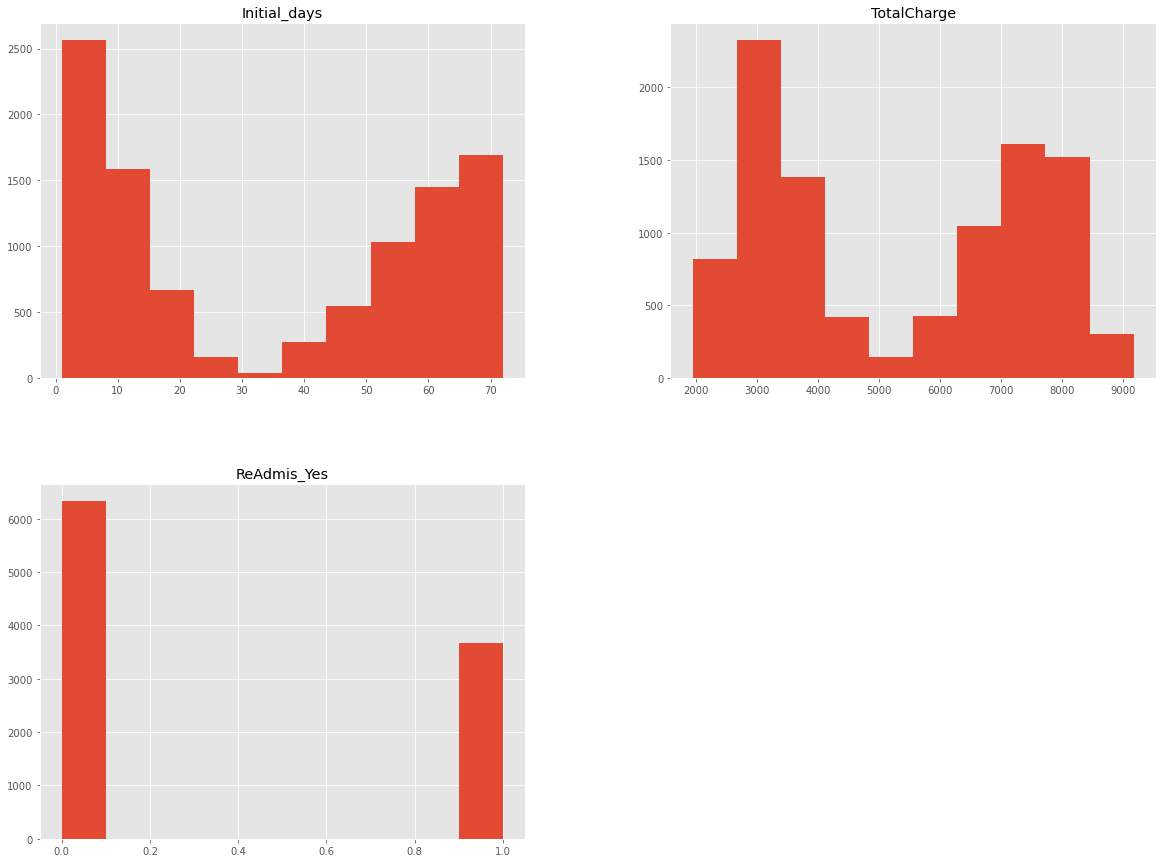

In [25]:
# https://www.datacamp.com/community/tutorials/preprocessing-in-data-science-part-1-centering-scaling-and-knn
plt.style.use('ggplot')
# df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv ' , sep = ';')
X = pruned_df.drop('ReAdmis_Yes', axis=1).values # drop target variable
y1 = pruned_df['ReAdmis_Yes'].values
pd.DataFrame.hist(pruned_df, figsize = [20,15]);

In [26]:
pruned_df.shape

(10000, 3)

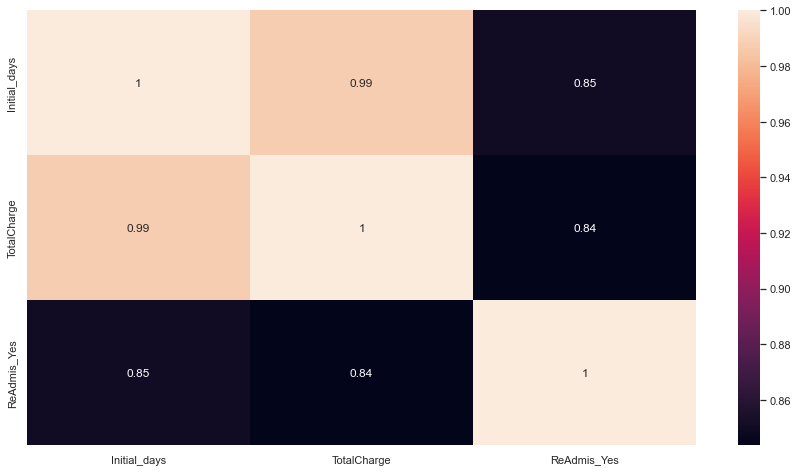

In [27]:
# Trying to make sense of numerical values, discover possible correlations
# Ref1: https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/
# Ref2: https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(pruned_df.corr(), annot=True);

### K-Means Clustering

In [28]:
# Create training and testing data
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

train, test = train_test_split(pruned_df, test_size=0.33, random_state=42)

In [29]:
print("***** Train_Set *****")
print(train.head())
print("\n")
print("***** Test_Set *****")
print(test.head())

***** Train_Set *****
      Initial_days  TotalCharge  ReAdmis_Yes
8371     44.814130    6273.5060            0
5027     58.207880    7198.0180            1
9234     54.292180    6635.2390            0
3944      4.151579    2793.3264            0
6862     65.784620    8015.4080            1


***** Test_Set *****
      Initial_days  TotalCharge  ReAdmis_Yes
6252     48.634250  6060.700000            0
4684     12.062901  3255.814455            0
1731      3.766619  2844.703206            0
4742     12.612046  3133.944906            0
4521     16.738161  4125.009552            0


### Describe Data Sets:

In [30]:
print("***** Train_Set *****")
print(train.describe())
print("\n")
print("***** Test_Set *****")
print(test.describe())

***** Train_Set *****
       Initial_days  TotalCharge  ReAdmis_Yes
count   6700.000000  6700.000000  6700.000000
mean      34.673080  5329.473974     0.370746
std       26.270470  2176.582176     0.483041
min        1.008401  1938.312067     0.000000
25%        8.050716  3182.687528     0.000000
50%       37.766110  5406.849000     0.000000
75%       61.178353  7468.244000     1.000000
max       71.968690  9180.728000     1.000000


***** Test_Set *****
       Initial_days  TotalCharge  ReAdmis_Yes
count   3300.000000  3300.000000  3300.000000
mean      34.013138  5277.046079     0.359091
std       26.386543  2188.021770     0.479807
min        1.001981  2004.755279     0.000000
25%        7.698318  3169.904451     0.000000
50%       25.436056  4733.546339     0.000000
75%       61.083813  7447.025750     1.000000
max       71.981490  9080.912000     1.000000


In [31]:
print(train.columns.values)

['Initial_days' 'TotalCharge' 'ReAdmis_Yes']


### Verify No Missing Values:

In [32]:
print("*****In the Train Set*****")
print(train.isna().sum())
print("\n")
print("*****In the Test Set*****")
print(test.isna().sum())

*****In the Train Set*****
Initial_days    0
TotalCharge     0
ReAdmis_Yes     0
dtype: int64


*****In the Test Set*****
Initial_days    0
TotalCharge     0
ReAdmis_Yes     0
dtype: int64


In [33]:
# Average of the train set grouped by ReAdmis_Yes
train[['ReAdmis_Yes', 'Initial_days', 'TotalCharge']].groupby(['ReAdmis_Yes'], as_index=False).mean().sort_values(by='ReAdmis_Yes', ascending=False)

,ReAdmis_Yes,Initial_days,TotalCharge
1,1,63.789812,7721.301692
0,0,17.517966,3920.247206


In [34]:
#df['A'].round(1).value_counts()

#train['Initial_days'] = train['Initial_days'].round(1).value_counts()

train[['ReAdmis_Yes', 'Initial_days', 'TotalCharge']].groupby(['Initial_days'], as_index=False).mean().sort_values(by='Initial_days', ascending=False)


,Initial_days,ReAdmis_Yes,TotalCharge
6699,71.968690,1.0,8492.714000
6698,71.965460,1.0,8593.803000
6697,71.964150,1.0,8862.365000
6696,71.961640,1.0,8033.647000
6695,71.961340,1.0,8748.038000
...,...,...,...
4,1.021004,0.0,2650.105439
3,1.013973,0.0,2338.902413
2,1.012481,0.0,2743.397256
1,1.010068,0.0,2010.399554


In [35]:
train[['ReAdmis_Yes', 'Initial_days', 'TotalCharge']].groupby(['TotalCharge'], as_index=False).mean().sort_values(by='TotalCharge', ascending=False)


,TotalCharge,ReAdmis_Yes,Initial_days
6697,9180.728000,1.0,71.373930
6696,9169.248000,1.0,71.004540
6695,9077.388000,1.0,70.583100
6694,9065.054000,1.0,69.732920
6693,9028.118000,1.0,71.021780
...,...,...,...
4,2010.399554,0.0,1.010068
3,2000.776336,0.0,1.042379
2,1969.472468,0.0,1.388694
1,1957.445547,0.0,1.241913


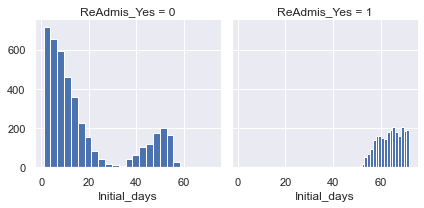

In [36]:
train[['ReAdmis_Yes', 'Initial_days', 'TotalCharge']].groupby(['ReAdmis_Yes'], as_index=False).mean().sort_values(by='ReAdmis_Yes', ascending=False)

g = sns.FacetGrid(train, col='ReAdmis_Yes')
g.map(plt.hist, 'Initial_days', bins=20);

In [37]:
# Takes too long, never completes
#grid = sns.FacetGrid(train, col='ReAdmis_Yes', row='Initial_days', height=2.2, aspect=1.6)
#grid.map(plt.hist, 'Initial_days', alpha=.5, bins=5)
#grid.add_legend();

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6700 entries, 8371 to 7270
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Initial_days  6700 non-null   float64
 1   TotalCharge   6700 non-null   float64
 2   ReAdmis_Yes   6700 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 209.4 KB


In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3300 entries, 6252 to 9401
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Initial_days  3300 non-null   float64
 1   TotalCharge   3300 non-null   float64
 2   ReAdmis_Yes   3300 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 103.1 KB


In [40]:
X = train.drop('ReAdmis_Yes', axis=1).values # drop target variable

y = train['ReAdmis_Yes'].values 

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6700 entries, 8371 to 7270
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Initial_days  6700 non-null   float64
 1   TotalCharge   6700 non-null   float64
 2   ReAdmis_Yes   6700 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 209.4 KB


In [49]:
# Generate cluster centers and labels
cluster_centers, _ = kmeans(train[['X', 'y']], 3)
train['cluster_labels'], _ = vq(train[['X', 'y']], cluster_centers)

KeyError: "None of [Index(['X', 'y'], dtype='object')] are in the [columns]"

In [43]:
# https://www.datacamp.com/tutorial/k-means-clustering-python
#https://stackoverflow.com/questions/70261095/sklearn-cluster-kmeans-got-typeerror-init-got-an-unexpected-keyword-argu
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, #precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(n_clusters=2)

In [44]:
### Not Working...
# 
# # correct = 0
# for i in range(len(train)):
#     predict_me = np.array(train[i].astype(float))
#     predict_me = predict_me.reshape(-1, len(predict_me))
#     prediction = kmeans.predict(predict_me)
#     if prediction[0] == y[i]:
#         correct += 1

# print(correct/len(train))


In [45]:
#KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
 #   n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
  #  random_state=None, tol=0.0001, verbose=0)